<ipython-input-17-45545e82e1c2>:31: RuntimeWarning: invalid value encountered in true_divide
  X = (v - x_center) * depth_map[u][v] / (depth_map[u][v] / foc_l)
<ipython-input-17-45545e82e1c2>:32: RuntimeWarning: invalid value encountered in true_divide
  Y = (u - y_center) * depth_map[u][v] / (depth_map[u][v] / foc_l)


-6.1
(4, 322222)
-8.2
(4, 298517)
8.75
(4, 323942)


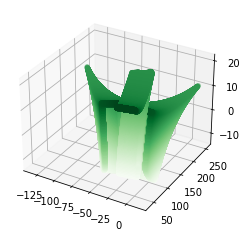

In [17]:
# Starter code (run this first)
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from scipy.spatial.transform import Rotation as R
from math import pi ,sin, cos
import math


def depthmap_to_pointcloud(path,fc):
    #depth_map = cv.imread('./world_rotate/depthmap.png',0)
    depth_map = cv.imread(path,0)
    height, width = depth_map.shape

    pt_cloud = []
    x_center = round(width / 2)
    y_center = round(height / 2)
    foc_l = fc
    X_s = []
    Z_s = []
    Y_s = []
    
    
    for u in range(0,height):
        for v in range(0,width):
            
            Z = depth_map[u][v]
            if(Z != 206):
                Z = 255 - Z
                X = (v - x_center) * depth_map[u][v] / (depth_map[u][v] / foc_l)
                Y = (u - y_center) * depth_map[u][v] / (depth_map[u][v] / foc_l)
            
                if math.isnan(X) != True:
                    if math.isnan(Y) != True:
                        if math.isnan(Z) != True:
                            X_s.append(X)
                            Y_s.append(Y)
                            Z_s.append(Z)

    Y_s = np.multiply(-1, Y_s)
    return np.vstack((X_s,Z_s,Y_s))

#pass in thera
#pts is a 3xn array
def rotate_pointcloud(pts, theta):
    n,m = pts.shape
    pts = np.vstack((pts, np.ones((1,m)))) # add a 1s array on the bottom to make it 4xN ptclod array
    print(pts.shape)
    r = theta * np.pi/180 # rotation matrix
    r_matrix = np.matrix(f'{np.cos(r)} {-np.sin(r)} 0 0; {np.sin(r)} {np.cos(r)} 0 0; 0 0 1 0; 0 0 0 1')
    pts = r_matrix @ pts
    pts = np.array(pts)
    return pts
    
    
fig2 = plt.figure()
ax = plt.axes(projection='3d')

filelist = ['./world_rotate/cube_01.png', './world_rotate/cube_02.png', './world_rotate/cube_03.png']

cloud_pts = []
for i,file in enumerate(filelist):
    pts = depthmap_to_pointcloud(file,.05)
    print(f'{pts[0][30]}')
    pts = rotate_pointcloud(pts,i*15)
    ax.scatter3D(pts[0],pts[1],pts[2],c=pts[2],cmap='Greens')
    cloud_pts.append(pts)
plt.show()

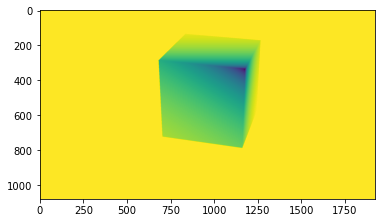

In [8]:
depth_map = cv.imread('./world_rotate/cube_01.png',0)
height, width = test.shape
#mask_bone = depth_map != 206
#test = np.where(mask_bone, depth_map, 0)

fig = plt.figure()
plt.imshow(depth_map
          )
plt.show()

In [ ]:
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()

subroutine triangulate
input : vertex list
output : triangle list
   initialize the triangle list
   determine the supertriangle
   add supertriangle vertices to the end of the vertex list
   add the supertriangle to the triangle list
   for each sample point in the vertex list
      initialize the edge buffer
      for each triangle currently in the triangle list
         calculate the triangle circumcircle center and radius
         if the point lies in the triangle circumcircle then
            add the three triangle edges to the edge buffer
            remove the triangle from the triangle list
         endif
      endfor
      delete all doubly specified edges from the edge buffer
         this leaves the edges of the enclosing polygon only
      add to the triangle list all triangles formed between the point 
         and the edges of the enclosing polygon
   endfor
   remove any triangles from the triangle list that use the supertriangle vertices
   remove the supertriangle vertices from the vertex list
end
 Suppose an edge e in E , if e meets the following conditions, it is called a Delaunay side:

In [ ]:
def triangulate(pt_cloud):
    triangle_list = []
    super_triangle_vertices = getSuperTriangle(pt_cloud)
    pt_cloud = pt_cloud.append([super_triangle_vertices])
    triangle_list = triangle_list.append([super_triangle_vertices])
    for i,pt in enumerate(pt_cloud):

In [18]:
cmap_op = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [20]:
cmap_op[1]

'Purples'